In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('placement.csv')

In [3]:
## steps 
##0. preprocess + EDA+ feature selection
##1. extract input and output cols
##2. scale the values
##3. train test split
##4. train the model
##5. evaluate the model/model selection
##6. deploy the model

In [4]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [5]:
df.shape

(100, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [7]:
df=df.iloc[:,1:] ##[row,column]  ## data pre-proccessing(removal of unneccesaay column)

In [8]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [9]:
## steps 
##0. preprocess + EDA+ feature selection
##1. extract input and output cols
##2. scale the values
##3. train test split
##4. train the model
##5. evaluate the model/model selection
##6. deploy the model

In [10]:
##EDA
import matplotlib.pyplot as plt


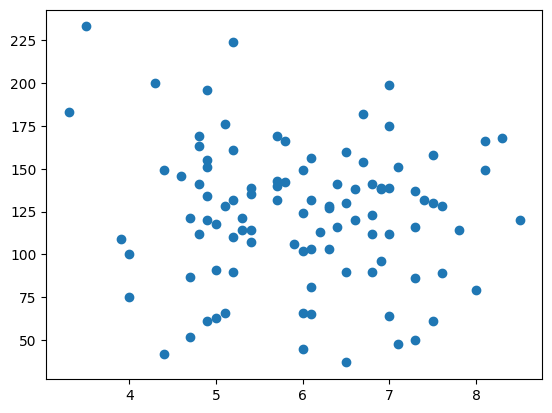

In [11]:
plt.scatter(df['cgpa'],df['iq'])

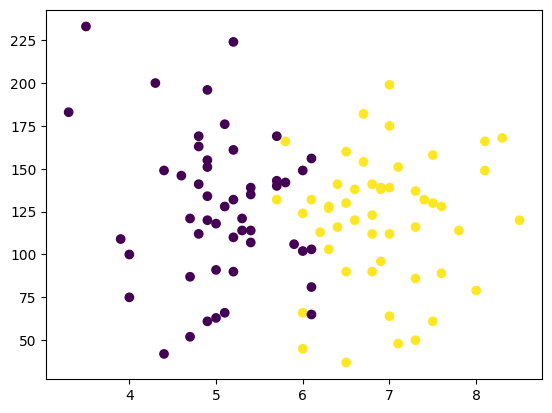

In [12]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [13]:
### features selections

In [14]:
## extract a input and output columns
## cgpa and iq(independent columns) or placement(dependent columns)

In [15]:
x=df.iloc[:,0:2] ## seperate input columns
y=df.iloc[:,-1] ## seperate placement(output) columns



In [16]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [17]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [18]:
## train test split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train ,y_test=train_test_split(x,y,test_size=0.1,) ## 90 goes in training set and 10 in test set

In [19]:
x_train

,cgpa,iq
93,6.8,112.0
60,6.9,139.0
73,4.9,61.0
54,6.4,141.0
59,4.8,112.0
...,...,...
96,4.4,42.0
4,5.8,142.0
83,7.5,130.0
19,5.2,132.0


In [20]:
y_train

93    1
60    1
73    0
54    1
59    0
     ..
96    0
4     0
83    1
19    0
42    1
Name: placement, Length: 90, dtype: int64

In [21]:
x_test

,cgpa,iq
13,6.4,116.0
53,8.3,168.0
26,7.0,199.0
68,4.0,75.0
2,5.3,121.0
79,6.5,90.0
36,5.7,140.0
85,5.8,166.0
49,5.4,135.0
29,7.0,112.0


In [22]:
y_test

13    1
53    1
26    1
68    0
2     0
79    1
36    0
85    1
49    0
29    1
Name: placement, dtype: int64

In [23]:
##2. scale the values(normalize between -1 to 1)
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

In [25]:
x_train = scaler.fit_transform(x_train)  ## fit_transform understoood the data and transform and fit

In [26]:
x_train

array([[ 0.72483114, -0.26525257],
       [ 0.81263033,  0.40897729],
       [-0.94335358, -1.53879787],
       [ 0.37363435,  0.45892024],
       [-1.03115277, -0.26525257],
       [-0.76775519,  1.33292192],
       [ 0.11023677, -0.48999586],
       [ 1.33942551,  0.88343534],
       [ 0.72483114, -0.81462505],
       [ 0.11023677, -1.43891196],
       [ 1.33942551, -1.53879787],
       [-0.5043576 ,  0.40897729],
       [-0.94335358,  0.28411991],
       [ 1.25162631,  0.23417696],
       [ 0.28583516,  0.10931957],
       [ 2.21741746, -0.06548076],
       [ 0.02243757, -1.41394048],
       [ 1.77842148, -1.08931129],
       [ 0.19803596, -0.24028109],
       [-0.85555438, -0.78965357],
       [ 0.72483114,  0.45892024],
       [ 1.60282309, -0.21530962],
       [ 0.72483114,  0.00943367],
       [-1.11895197, -0.04050928],
       [-1.47014875,  1.93223735],
       [-0.85555438, -0.11542371],
       [ 1.86622068,  0.65869205],
       [ 0.54923275, -0.06548076],
       [ 0.90042953,

In [27]:
x_test = scaler.fit_transform(x_test)

In [28]:
x_test

array([[ 0.23270005, -0.4527401 ],
       [ 1.93320038,  1.00049973],
       [ 0.76970015,  1.86685425],
       [-1.91530037, -1.59856382],
       [-0.75180015, -0.3130055 ],
       [ 0.32220006, -1.17936002],
       [-0.39380008,  0.21798598],
       [-0.30430006,  0.94460589],
       [-0.66230013,  0.07825138],
       [ 0.76970015, -0.56452778]])

In [29]:
##4 train the model 
from sklearn.linear_model import LogisticRegression


In [30]:
clf = LogisticRegression()

In [31]:
## model training
clf.fit(x_train,y_train)

LogisticRegression()

In [32]:
##5 . evaluate the model/model selection

In [35]:
y_pred=clf.predict(x_test)
y_pred

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 1])

In [34]:
y_test

13    1
53    1
26    1
68    0
2     0
79    1
36    0
85    1
49    0
29    1
Name: placement, dtype: int64

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(y_test,y_pred)

0.9

In [40]:
## how to plot the decission boundry
!pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.4 MB 281.8 kB/s eta 0:00:05
   -- ------------------------------------- 0.1/1.4 MB 585.1 kB/s eta 0:00:03
   -- ------------------------------------- 0.1/1.4 MB 585.1 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.4 MB 525.1 kB/s eta 0:00:03
   ----- ---------------------------------- 0.2/1.4 MB 619.5 kB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.4 MB 656.4 kB/s eta 0:00:02
   -------- ------------------------------- 0.3/1.4 MB 764.6 kB/s eta 0:00:02
   -------- ------------------------------- 0.3/1.4 MB 764.6 kB/s eta 0:00:02
   ---------- -----------------

In [41]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

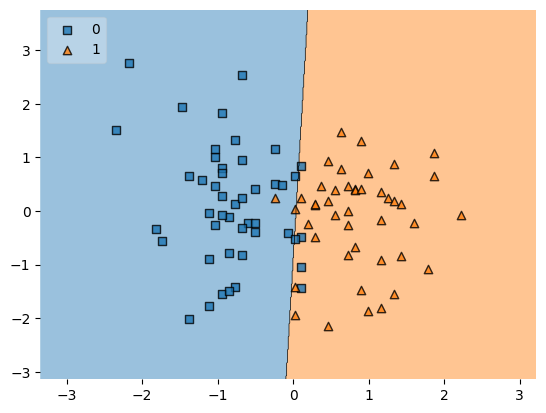

In [43]:
# Plotting decision regions
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

In [44]:
import pickle ## pickle converts object to a file

In [45]:
pickle.dump(clf,open('model.pkl','wb'))